Let's import the needed libraries:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

We want to make an animated plot of a projectile's trajectory that is shot from a certain angle and height.
We also add the plot of a bouncing ball.

In [2]:
#Let's define the initial position of the projectile.
x0 = 0
h = 0   
y0 = h    #The projectile is shot from the ground
dt = 0.01 #Time increment
t = 0     #Starting time of the evolution

theta = np.deg2rad(30)  #Shooting angle 

#Let's define the initial velocity of the projectile.
v0 = 80   #Magnitude of the initial velocity of the projectile

v0x = v0*np.cos(theta)
v0y = v0*np.sin(theta)

Here we define the equation of motion of the system

In [3]:
def x(t):
  return x0 + v0x*t

def y(t):
  return y0 + v0y*t - 0.5*9.81*t*t

def R(t):
  return 80*np.absolute(np.cos(2*t)*np.exp(-t/3.))

Let's evaluate the values of the position in function of time

In [4]:
times = np.arange(0, 100, dt)

xi = [x(t) for t in times if y(t) >= 0]
yi = [y(t) for t in times if y(t) >= 0]
Ri = [R(t) for t in times if y(t) >= 0]

Then we prepare the plot:

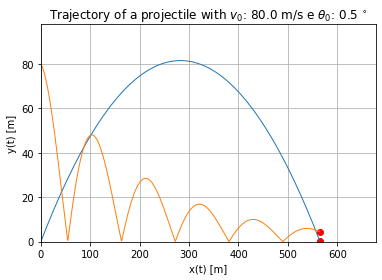

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on = False, xlim = (-0.1, max(xi)*1.2), ylim = (-0.1, max(yi)*1.2))
ax.grid()
ax.set_xlabel("x(t) [m]")
ax.set_ylabel("y(t) [m]")
plt.title(r"Trajectory of a projectile with $v_0$: %.1f m/s e ${\theta}_0$: %.1f $^{\circ}$" %(v0, theta))

#Let's do the animation: firstly we define the initial frame
ball = ax.plot(xi[0], yi[0], 'o-', lw = 2, color = 'red')
line = ax.plot(xi[0], yi[0], '-', lw = 1)
ball2 = ax.plot(xi[0], Ri[0], 'o-', lw = 2, color = 'red')
jump = ax.plot(xi[0], Ri[0], '-', lw = 1)

#Now we create the evolution in time:
def update_plots(i):
  line[0].set_data(xi[:i], yi[:i])
  ball[0].set_data(xi[i], yi[i]) 
  jump[0].set_data(xi[:i], Ri[:i])
  ball2[0].set_data(xi[i], Ri[i]) 
  return line[0], ball[0], jump[0], ball2[0],

#Finally we print the results
ani = animation.FuncAnimation(fig, update_plots, np.arange(1, len(xi)), interval = 20, blit = True, repeat = True)

#These lines are needed to make the plot visible
from matplotlib import rc

rc('animation', html = 'html5')
ani